In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import math
from queue import Queue

In [3]:
def setupPlots(numberPlots=1):
    r"""Setups a figure and returns the figure and axis. 
    Receives the number of plots"""
    x = min(2, numberPlots)
    y = int((numberPlots+1)/2) 
    #_ = figure(figsize=(10*x, y*6), dpi=80)
    fig, ax = plt.subplots(y,x, squeeze=False, figsize=(10*x, y*6), dpi=80)
    ax2 = []
    it = 0
    for yy in ax:
        for xx in yy:
            if(it == numberPlots):
                break
            ax2.append(xx)
            it += 1
            

    return fig, ax2

In [4]:
def thresholdImage(img, range :tuple, value, remain = True):
    r"""Receives a single channel Image, a range, and the substitute value. Elements inside (inclusive)
    that range, gets their values replaced by the value specified.
    If remain==True, the remaining pixels conserve its value, otherwise the remaining pixels are reset 2 zero"""

    mask = np.bitwise_and(img<=range[1], img>=range[0])
    mask2 = np.bitwise_not(mask)
    if(remain == False):
        return mask*value
    else:
        return mask*value + img*mask2

In [43]:
def Dilatation(kernel, img):
    r''' Los que se salen del kernel, son 0'''
    #print(img.size)
    #print(img)
    N = img.shape[0]
    M = img.shape[1]

    kN = kernel.shape[0]
    kM = kernel.shape[1]

    kernel = np.array(kernel, dtype=int)
    base = np.count_nonzero(kernel)

    ans = np.ones(img.shape)*255
    for i in range(0+kN-1,N):
        for j in range(0+kM-1, M):
            #print(i, j, i-kN+1, j-kM+1, j+1, kernel.shape)
            imgKern = np.array(img[i-kN+1:i+1, j-kM+1:j+1], dtype=int)
            ##imgKern = img[0:5,0:5]
            
            #print(imgKern)
            imgCheck = imgKern + kernel
            imgCheck -= np.ones(imgKern.shape, dtype=int)*255*2
            cc = np.count_nonzero(imgCheck==0)
            if(cc > 0):
                ans[i-int(kN/2)][j-int(kM/2)] = 255
            else:
                ans[i-int(kN/2)][j-int(kM/2)] = 0
    return ans

            

In [6]:
def Erosion(kernel, img):
    r''' Los que se salen del kernel, son 0'''
    #print(img.size)
    #print(img)
    N = img.shape[0]
    M = img.shape[1]

    kN = kernel.shape[0]
    kM = kernel.shape[1]

    kernel = np.array(kernel, dtype=int)
    base = np.count_nonzero(kernel)
    #print(base)
    ans = np.zeros(img.shape)
    for i in range(0+kN-1,N):
        for j in range(0+kM-1, M):
            #print(i, j, i-kN+1, j-kM+1, j+1, kernel.shape)
            imgKern = np.array(img[i-kN+1:i+1, j-kM+1:j+1], dtype=int)
            ##imgKern = img[0:5,0:5]
            
            #print(imgKern)
            #print(imgKern)
            imgCheck = imgKern + kernel
            #print(imgCheck)
            imgCheck -= np.ones(imgKern.shape, dtype=int)*255*2
            cc = np.count_nonzero(imgCheck==0)
            #print(imgCheck)
            #return ans
            if(base == cc):
                ans[i-int(kN/2)][j-int(kM/2)] = 255
    return ans

            

In [32]:
def negateImage(img, K=255):
    r"""Returns negated version of image in uint8!!!"""
    img2 = np.int16(img)
    img2 = img2*-1+K
    return np.uint8(img2)

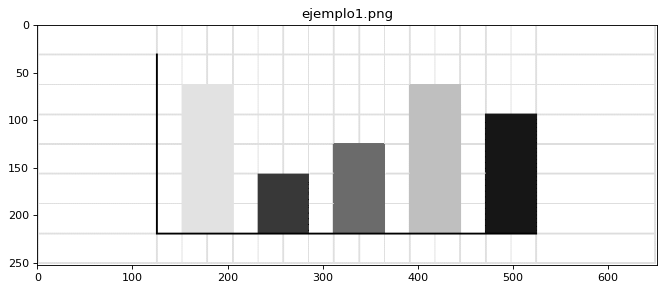

In [36]:
imgNames = ['ejemplo1.png']
imgPath = '../dataset/'
imgs = []
N = len(imgNames)
for imgName in imgNames:
    imgBGR = cv2.imread(imgPath + imgName)
    imgBW = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)
    imgs.append(imgBW)
fig, ax = setupPlots(N)
for axes, img, name in zip(ax, imgs, imgNames):
    axes.imshow(img, cmap = 'gray')
    axes.set_title(name)

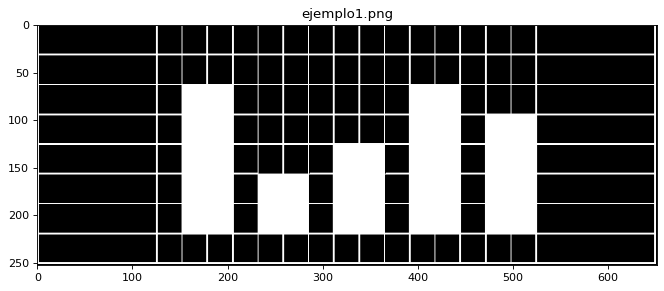

In [37]:
imgs2 = []
for img in imgs:
    imgs2.append(negateImage(thresholdImage(thresholdImage(img, (0,250), 0, remain=True), (251,255), 255, remain=True)))

imgs = imgs2
fig, ax = setupPlots(N)
for axes, img, name in zip(ax, imgs2, imgNames):
    axes.imshow(img, cmap = 'gray')
    axes.set_title(name)

#print(imgs[0])

In [55]:
def getCols(n,m, start, stop, img):
    x,y = img.shape
    stop -= start
    number = int(y/(n+m))+1
    cols = np.zeros((number,x))
    print(img.shape)
    print(cols.shape)
    for i in range(number):
        cols[i] = img[:, start]
        start += n+m
    return cols

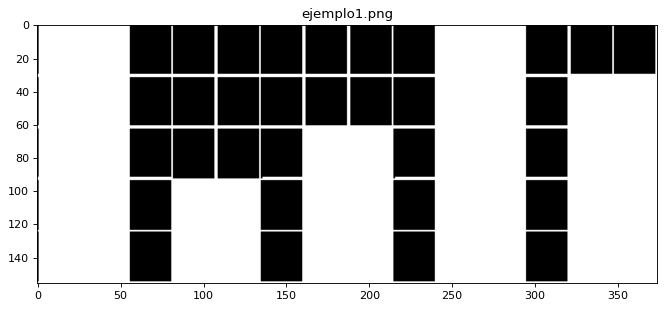

In [39]:
imgs[0] = imgs[0][64:220, 151:525]


#imgs = imgs2
fig, ax = setupPlots(N)
for axes, img, name in zip(ax, imgs, imgNames):
    axes.imshow(img, cmap = 'gray')
    axes.set_title(name)

#print(imgs[0])

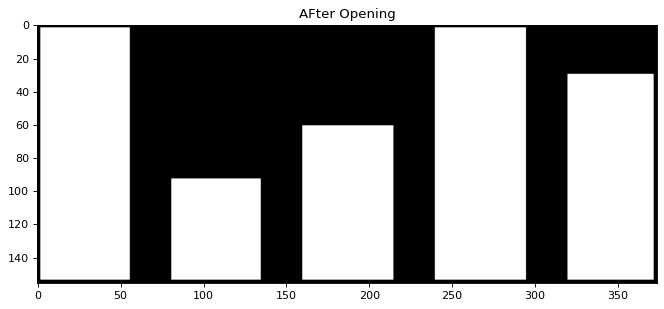

In [42]:
fig, ax = setupPlots(1)
kernel = np.ones((5,5))*255
imgsAntesMorir = imgs[0]
for i in range(50):
    imgs[0] = Dilatation(kernel, Erosion(kernel, imgs[0])) # opening
ax[0].imshow(imgs[0], cmap='gray')
ax[0].set_title('AFter Opening')

plt.show()

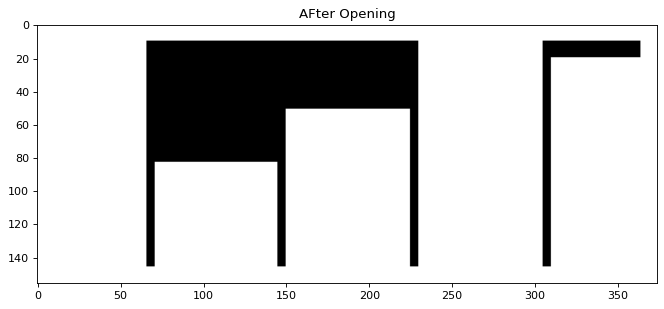

In [44]:
fig, ax = setupPlots(1)
kernel = np.ones((5,5))*255
imgsAntesMorir = imgs[0]
for i in range(5):
    imgs[0] = Dilatation(kernel, imgs[0]) # opening
ax[0].imshow(imgs[0], cmap='gray')
ax[0].set_title('AFter Opening')

plt.show()

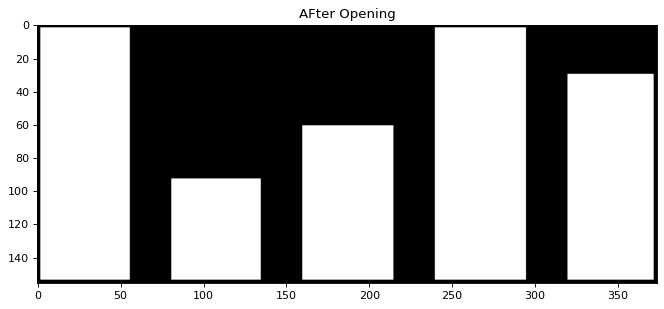

In [45]:
imgs[0] = imgsAntesMorir
fig, ax = setupPlots(1)
ax[0].imshow(imgs[0], cmap='gray')
ax[0].set_title('AFter Opening')
plt.show()

In [60]:
a = getCols(54,27,20,imgs[0].shape[1], imgs[0])
print(a)
print(len(a))

(156, 374)
(5, 156)
[[  0.   0. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
  255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255. 255.
    0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.

In [90]:
cuadrito_size = 27
#fig, ax = setupPlots(5)
for i in range(5,6):
    kernel = np.ones((1,cuadrito_size*i))*255
    pp2 = Erosion(kernel, a[:, -cuadrito_size*i-2:-2])
    print(a[:, -cuadrito_size*i-1:].shape)
    #ax[i-1].imshow(pp2, cmap='gray')
    print(pp2)


(5, 136)
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0. 